In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
adult = pd.read_csv('adult.csv', sep = ',', names = ['age', 'workclass', 'fnIwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'])

In [10]:
adult.shape

(32562, 15)

In [11]:
adult.head()

,age,workclass,fnIwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [12]:
adult.tail()

,age,workclass,fnIwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32557,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32558,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32560,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32561,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
adult.describe()

,age,workclass,fnIwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562
unique,74,10,21649,17,17,8,16,7,6,3,120,93,95,43,3
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


In [48]:
n_records = adult.shape[0]
n_greater_50k = adult[adult['income'] == '>50K']. shape[0]
n_at_most_50k = adult[adult['income'] == '<=50K']. shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total number of records: {}".format(n_records))
print("Individuals making more that $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,00: {}".format(greater_percent))

Total number of records: 32562
Individuals making more that $50,000: 0
Individuals making at most $50,000: 0
Percentage of individuals making more than $50,00: 0.0


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
for col in adult.columns:
    if adult[col].dtypes == 'object':
        adult[col] = le.fit_transform(adult[col])

In [52]:
adult.head()

,age,workclass,fnIwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,NaN
1,72,0,20407,11,15,6,0,1,4,0,0,86,34,39,NaN
2,65,4,2652,11,15,6,4,1,4,0,0,86,9,39,NaN
3,49,0,7318,15,1,6,0,4,2,0,0,86,34,39,NaN
4,37,4,3149,5,10,0,7,4,4,0,0,84,34,39,NaN


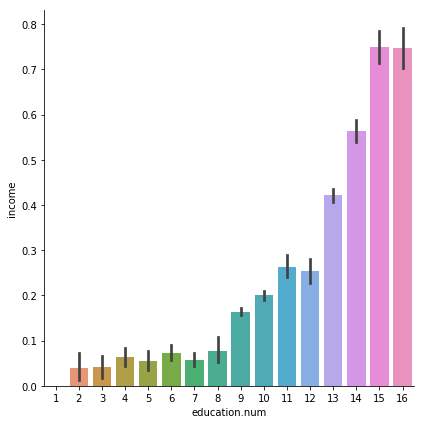

In [60]:
dataset = pd.read_csv('adult.csv')
#removing '?' containing rows
dataset = dataset[(dataset != '?').all(axis=1)]
#label the income objects as 0 and 1
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1})

sns.catplot( x = 'education.num', y = 'income',data = dataset,kind = 'bar',height = 6)
plt.show()

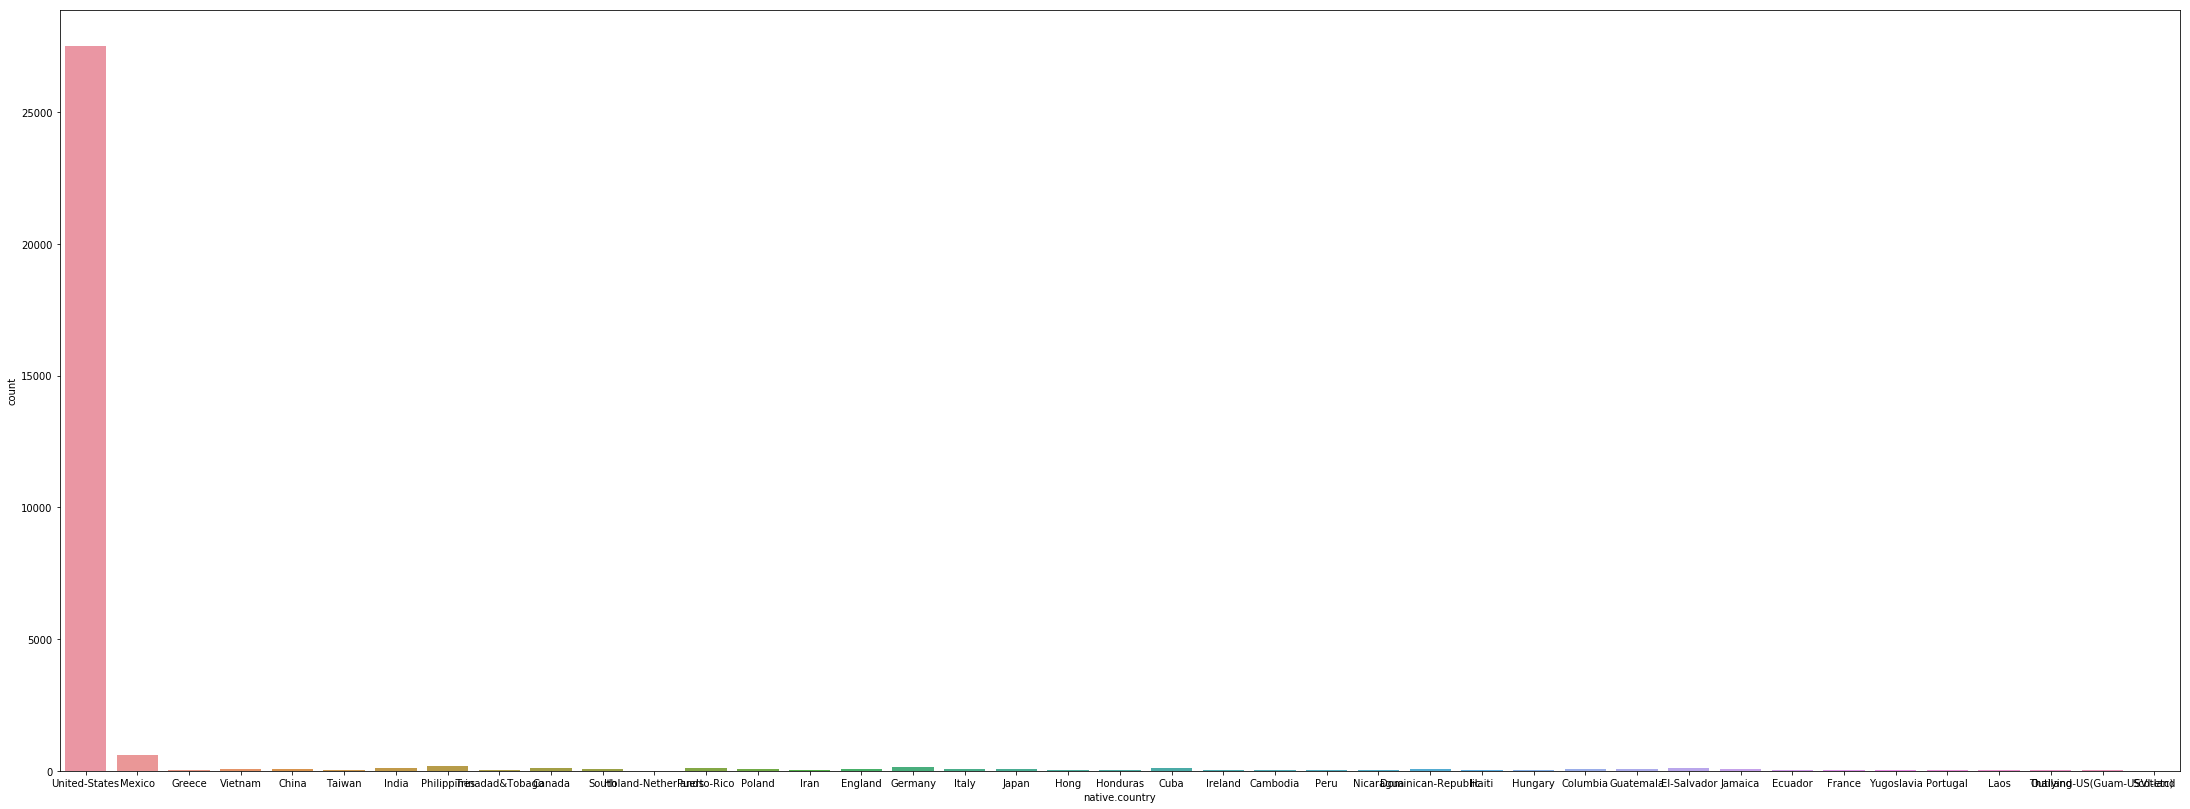

In [20]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native.country',data=dataset)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


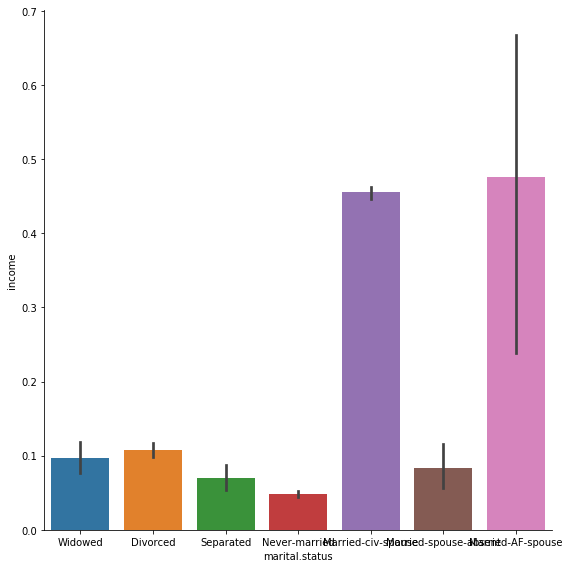

In [21]:
#marital.status vs income
sns.factorplot(x='marital.status',y='income',data=dataset,kind='bar',height=8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


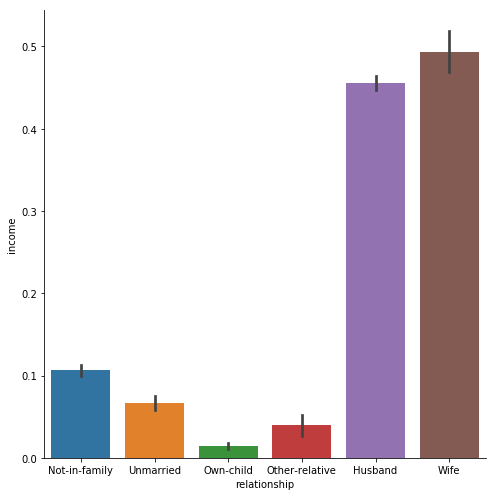

In [22]:
#relationship vs income
sns.factorplot(x='relationship',y='income',data=dataset,kind='bar',size=7)
plt.show()

In [23]:
for column in dataset:
    enc=LabelEncoder()
    if dataset.dtypes[column]==np.object:
         dataset[column]=enc.fit_transform(dataset[column])


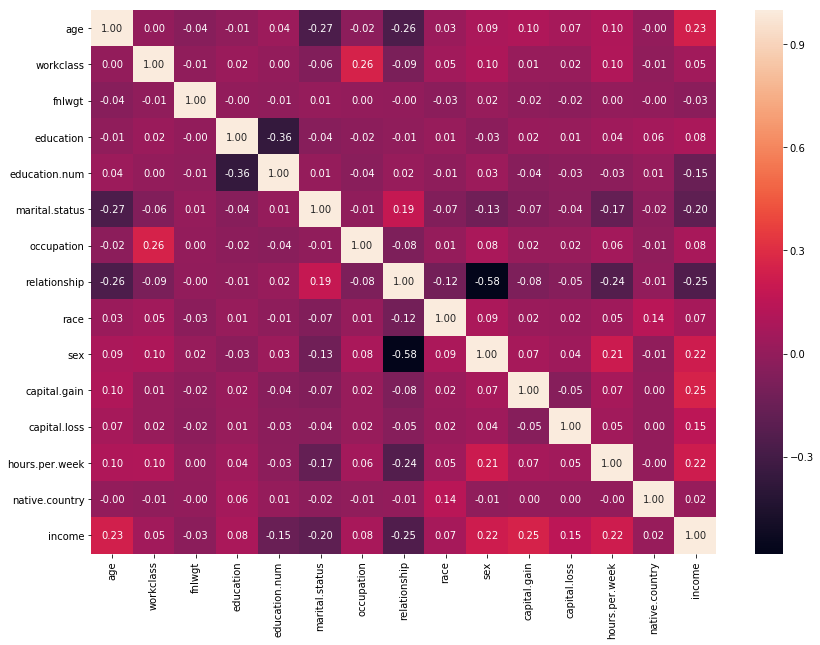

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(adult.corr(),annot=True,fmt='.2f')
plt.show()

In [25]:
X = adult[['age', 'workclass', 'fnIwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']]

In [26]:
Y = adult.income

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [28]:
model = []

In [29]:
model.append(("LR", LogisticRegression()))
model.append(("LDA", LinearDiscriminantAnalysis()))
model.append(("KNN", KNeighborsClassifier()))
model.append(("CART", DecisionTreeClassifier()))
model.append(("NB", GaussianNB()))

In [30]:
result = []

In [31]:
names = []

In [32]:
from sklearn import model_selection

In [33]:
for name, models in model:
    kfold = model_selection.KFold(n_splits = 10, random_state = 7)
    cv_result = model_selection.cross_val_score(models, x_train, y_train, cv = kfold, scoring = "accuracy")
    result.append(cv_result)
    names.append(name)
    msg = "%s,%f,(%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto'

LR,0.999912,(0.000175)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LDA,0.789541,(0.006553)
KNN,0.752116,(0.011613)
CART,0.999868,(0.000281)
NB,0.985960,(0.003249)
